In [7]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
# "TotalCharges" 컬럼에서 숫자형태의 문자가 아닌 값은 결측치 처리한다
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

# 🔎 errors 옵션 3가지
    # pd.to_numeric(..., errors=?)에는 3가지 선택지 有:
    # errors='raise' (기본값)
    # 변환 불가능한 값이 있으면 에러(예외) 발생
    # 예) "abc" 같은 게 있으면 코드가 멈춤
    # errors='ignore'
    # 변환 불가능한 값은 그냥 그대로 두고 무시
    # 예) "abc"는 문자열로 남고, 나머지 숫자만 변환됨
    # errors='coerce'
    # 변환 불가능한 값은 **NaN(결측치)**으로 바꿈
    # 데이터 정리할 때 제일 많이 씀

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

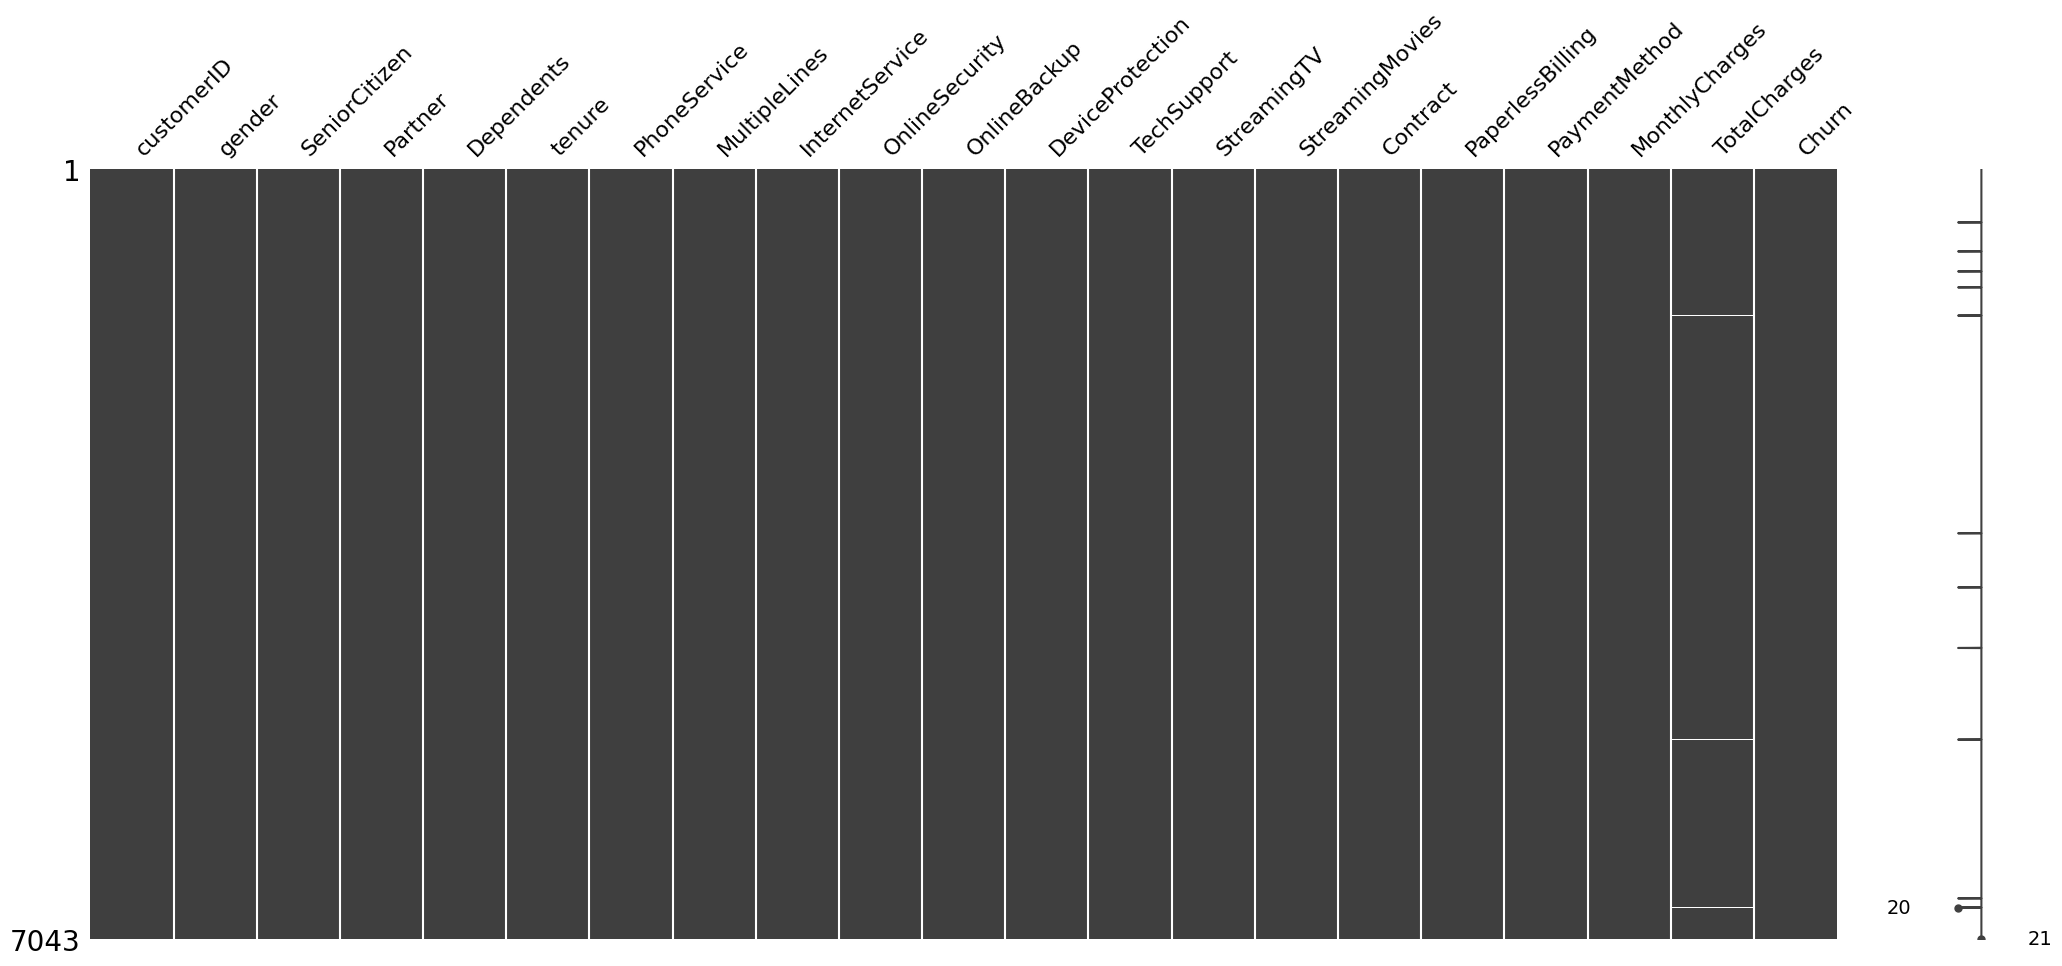

In [9]:
# 결측치 시각화
import missingno as msno
msno.matrix(df)

In [10]:
df.isna().mean()  # TotalCharges   결측치 비율은     0.001562 --> 해당 결측치 row 데이터를 삭제
print(len(df))
df = df.dropna(subset=['TotalCharges'])
print(len(df))

7043
7032


In [ ]:
# 이탈여부 Churn --> yes no : 1 0 으로 변경  분석하기 용이함(ex true/false, 남/여)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
df['Churn']

C:\Users\Playdata 2\AppData\Local\Temp\ipykernel_17632\3116952867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [13]:
df['Churn'].unique()

array([0, 1])

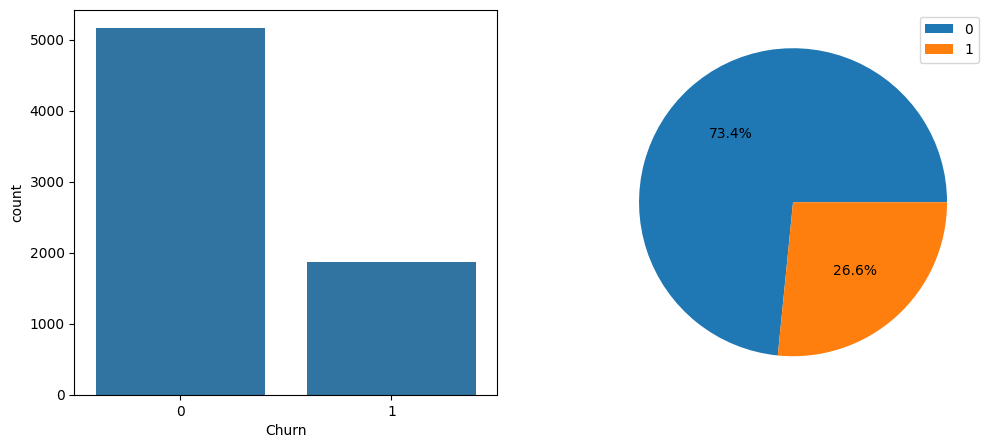

In [15]:
# 이탈고객의 현황 
# countplot
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df,x='Churn',ax=ax[0])
df['Churn'].value_counts()
ax[1].pie(x = df['Churn'].value_counts(),autopct='%1.1f%%')
ax[1].legend(['0','1'])
plt.show()
# 계약종류, 가입기간

C:\Users\Playdata 2\AppData\Local\Temp\ipykernel_17632\2382353743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges_Rank'] = pd.qcut(df['TotalCharges'], q=3, labels=['M','L','H'])


<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

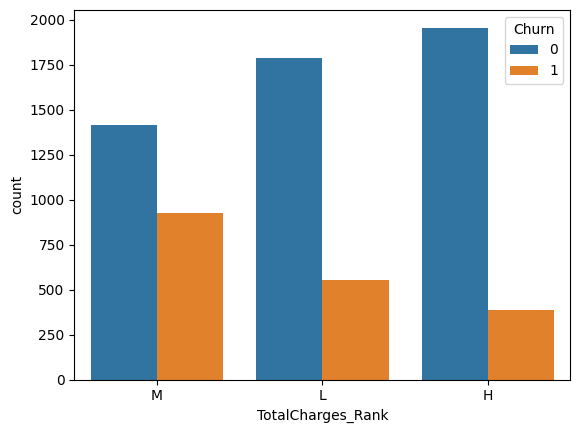

In [ ]:
# 타깃이되는 변수와 같이 영향을 미치는 다른 변수와의 관계
df.head()
# 비용에따른 가입유지여부 확인
# TotalCharges 3등분해서 (H,M,L)  -> 새로운 컬럼에 추가
df['TotalCharges_Rank'] = pd.qcut(df['TotalCharges'], q=3, labels=['M','L','H'])
df.tail()
# 새로운컬럼별 가입여부에대한 groupby 를 해서 시각화까지
sns.countplot(data=df, x='TotalCharges_Rank',hue='Churn')

In [ ]:
# 계약 종류(Contract)에 따른 고객 분포
# 가입 기간(tenure) 분포
# 계약 종류에 따른 이탈률
# 가입 기간에 따른 이탈률
# 월 요금에 따른 이탈률
# 상관관계 분석 (Correlation Analysis)

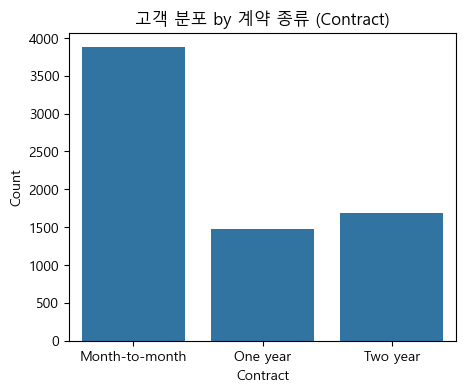

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1) 계약 종류(Contract)에 따른 고객 분포
# ================================
plt.rc('font', family='Malgun Gothic') 
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Contract')
plt.title('고객 분포 by 계약 종류 (Contract)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

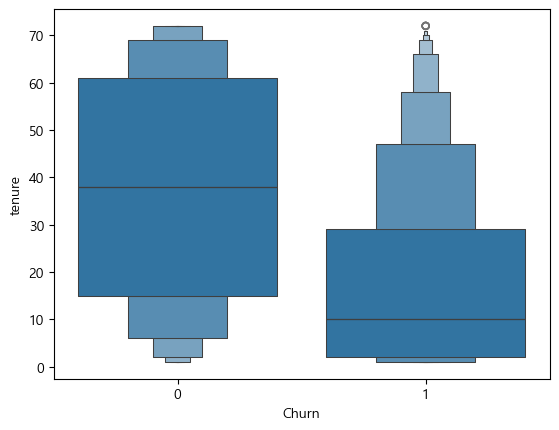

In [24]:
# 가입기간 분포
sns.boxenplot(data=df, x='Churn', y='tenure')

In [36]:
# 월 요금에 따른 이탈률
df[['MonthlyCharges','Churn']]
sns.kdeplot(data=df, x='MonthlyCharges', y='Density')

ValueError: Could not interpret value `Density` for `y`. An entry with this name does not appear in `data`.

In [ ]:
# 상관관계 
df.corr
# df를 수치형 데이터로만 (문자열이 아닌) 구성해서 .corr 적용 
# --> 방법: df.info()로 datatype이 수치형인 것들을 파악


KeyError: 'origin'

In [ ]:
df.describe().columns
df.loc[:,df.describe().columns].corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


In [ ]:
# pearson 상관계수
# 특정 두 데이터간의 평균을 각각 구한다.
